In [4]:
import numpy as np
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split


dataset = pd.read_csv('/Users/eddie/Downloads/METEC Tests - Sheet3.csv')

X = pd.DataFrame(dataset.iloc[:,:2].values)
Y = pd.DataFrame(dataset.iloc[:,2:].values)
print(X)
print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(Y_train.shape)

         0    1
0      186  204
1      186  204
2      185  203
3      186  204
4      186  204
...    ...  ...
30383  181  180
30384  179  180
30385  178  180
30386  180  179
30387  181  180

[30388 rows x 2 columns]
       0
0      0
1      0
2      0
3      0
4      0
...   ..
30383  0
30384  0
30385  0
30386  0
30387  0

[30388 rows x 1 columns]
(24310, 2)
(24310, 1)


In [5]:
from deepforest import CascadeForestClassifier
#load the base DFC model
model = CascadeForestClassifier()

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

#using the Adaboost and RF testing combination
estimator1 = AdaBoostClassifier(n_estimators = 100)
estimator2 = RandomForestClassifier(n_estimators = 100)

#load the different base layers into the model 
n_estimators = 2  # the number of base estimators per cascade layer
estimators = [AdaBoostClassifier(random_state = 1), AdaBoostClassifier(random_state=2), RandomForestClassifier(random_state=3),RandomForestClassifier(random_state = 4)]

model.set_estimator(estimators)


In [6]:
model.fit(X_train, Y_train)

[2025-03-26 06:51:51.343] Start to fit the model:
[2025-03-26 06:51:51.343] Fitting cascade layer = 0 


c:\Users\eddie\anaconda3\envs\ModifiedDFC\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[2025-03-26 06:51:56.966] layer = 0  | Val Acc = 91.403 % | Elapsed = 5.623 s
[2025-03-26 06:51:56.983] Fitting cascade layer = 1 
[2025-03-26 06:52:09.395] layer = 1  | Val Acc = 89.605 % | Elapsed = 12.412 s
[2025-03-26 06:52:09.395] Early stopping counter: 1 out of 2
[2025-03-26 06:52:09.402] Fitting cascade layer = 2 
[2025-03-26 06:52:22.902] layer = 2  | Val Acc = 90.930 % | Elapsed = 13.499 s
[2025-03-26 06:52:22.902] Early stopping counter: 2 out of 2
[2025-03-26 06:52:22.902] Handling early stopping
[2025-03-26 06:52:22.944] The optimal number of layers: 1


In [7]:
res = model.predict(X_test)
print(res)
# print(Y_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,res)
print(accuracy)
from sklearn.metrics import classification_report
print(classification_report(Y_test,res,digits=6))

[2025-03-26 06:52:22.988] Start to evalute the model:
[2025-03-26 06:52:22.988] Evaluating cascade layer = 0 
[0 0 1 ... 1 0 0]
0.9157617637380717
              precision    recall  f1-score   support

           0   0.872093  0.994988  0.929496      3392
           1   0.992301  0.815711  0.895382      2686

    accuracy                       0.915762      6078
   macro avg   0.932197  0.905350  0.912439      6078
weighted avg   0.925215  0.915762  0.914420      6078



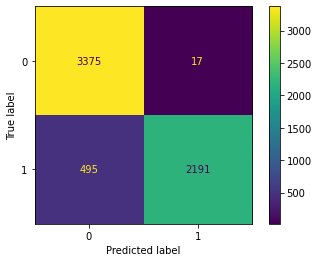

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusionmatrix = confusion_matrix(Y_test, res)
cm_display = ConfusionMatrixDisplay(confusionmatrix)
cm_display.plot()